In [1]:
#Troubleshoot the Library

In [3]:
cd ../

/Users/zak/Documents/Projects


In [4]:
import diva_seq_opt
print(diva_seq_opt.__file__)

/usr/local/lib/python3.7/site-packages/diva_seq_opt/__init__.py


### Prediction Workflow

In [2]:
import pandas as pd
from IPython.display import display
from diva_dna_seq.utility import prepare_data

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
ladder_file = 'data/test/Nextera_1_JD_High Sensitivity DNA Assay_DE24802700_2018-07-25_15-29-25_Ladder.csv'
bioanalyzer_file = 'data/test/Nextera_1_JD_High Sensitivity DNA Assay_DE24802700_2018-07-25_15-29-25_Sample1.csv'

In [4]:
df = prepare_data(ladder_file,bioanalyzer_file)

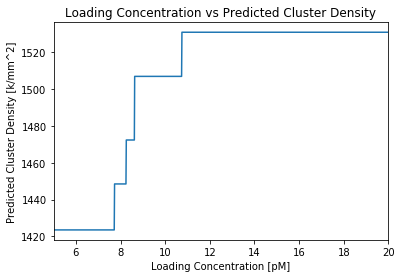

In [5]:
#Load Model
import pickle
with open('model/model.pkl','rb') as fp:
    model = pickle.load(fp)

from diva_dna_seq.utility import aproximate_sequence
state,bps = aproximate_sequence(df,n=10,stop=12000)
    
from diva_dna_seq import predict_loading_concentration
predict_loading_concentration(state,model)

### Train Workflow

In [6]:
ladder_file = 'data/train/20180710_JD_NK_High Sensitivity DNA Assay_DE24802700_2018-07-10_15-44-55_Ladder.csv'
bioanalyzer_file = 'data/train/20180710_JD_NK_High Sensitivity DNA Assay_DE24802700_2018-07-10_15-44-55_Sample7.csv'

In [7]:
df = prepare_data(ladder_file,bioanalyzer_file)

from diva_dna_seq.utility import get_sample_metadata
llc,clust_density = get_sample_metadata(bioanalyzer_file)

print(llc,clust_density)
display(df.head())

10.0 716.0


,Time,Value,base pairs
914,77.70,0.000008,500.877193
915,77.75,0.000008,501.754386
916,77.80,0.000008,502.631579
917,77.85,0.000008,503.508772
918,77.90,0.000008,504.385965


In [8]:
from diva_dna_seq.utility import get_training_files
get_training_files('data/train')

[['data/train/nextera4_jlc_High Sensitivity DNA Assay_DE24802700_2016-11-10_11-15-46_Ladder.csv',
  'data/train/nextera4_jlc_High Sensitivity DNA Assay_DE24802700_2016-11-10_11-15-46_Sample1.csv'],
 ['data/train/nk_03_06_2018_High Sensitivity DNA Assay_DE24802700_2018-03-06_15-11-01_Ladder.csv',
  'data/train/nk_03_06_2018_High Sensitivity DNA Assay_DE24802700_2018-03-06_15-11-01_Sample2.csv'],
 ['data/train/ggoyal_High Sensitivity DNA Assay_DE24802700_2017-08-22_12-14-49_Ladder.csv',
  'data/train/ggoyal_High Sensitivity DNA Assay_DE24802700_2017-08-22_12-14-49_Sample1.csv'],
 ['data/train/GG_20170621_High Sensitivity DNA Assay_DE24802700_2017-06-21_14-37-03_Ladder.csv',
  'data/train/GG_20170621_High Sensitivity DNA Assay_DE24802700_2017-06-21_14-37-03_Sample2.csv'],
 ['data/train/ggoyal_High Sensitivity DNA Assay_DE24802700_2017-07-11_14-23-16_Ladder.csv',
  'data/train/ggoyal_High Sensitivity DNA Assay_DE24802700_2017-07-11_14-23-16_Sample1.csv'],
 ['data/train/NK_582018_High Sensi

In [9]:
my_dict = {}
for i in range(5):
    my_dict.setdefault('a',[]).append(1)
    my_dict.setdefault('b',[]).append(2)
print(my_dict)

{'a': [1, 1, 1, 1, 1], 'b': [2, 2, 2, 2, 2]}


In [10]:
import re
regex = '.*ladder'
string = 'data/train/nextera4_jlc_High Sensitivity DNA Assay_DE24802700_2016-11-10_11-15-46_Ladder.csv'
match = re.match(regex,string,flags=re.I)
print(match.group(0))

data/train/nextera4_jlc_High Sensitivity DNA Assay_DE24802700_2016-11-10_11-15-46_Ladder


In [11]:
from diva_dna_seq.utility import load_training_data
df = load_training_data('data/train')
display(df)

,Library Loading Concentration,Cluster Density,0,1200,2400,3600,4800,6000,7200,8400,9600,10800
0,5.90,1066.0,0.003994,0.065286,0.144224,0.153300,0.157728,0.161617,0.142749,0.099958,0.054054,0.024850
0,10.00,1430.0,0.073752,0.131128,0.179011,0.149666,0.124350,0.099274,0.092842,0.108381,0.066979,0.027175
0,11.50,1703.0,0.079167,0.100278,0.187861,0.164095,0.150228,0.130235,0.099989,0.081804,0.054154,0.033249
0,12.00,1208.0,0.006455,0.130559,0.191466,0.137700,0.110197,0.096225,0.107244,0.130296,0.064751,0.034082
0,13.00,1247.0,-0.010840,0.064858,0.154314,0.163554,0.155729,0.148687,0.117822,0.099514,0.074324,0.030946
0,9.00,1199.0,0.005068,0.086839,0.163233,0.165949,0.159814,0.142109,0.117200,0.081813,0.053703,0.035959
0,9.50,1636.0,0.072636,0.143715,0.180364,0.143719,0.126057,0.107658,0.111109,0.091598,0.050370,0.029390
0,6.30,1335.0,0.046959,0.178072,0.161340,0.130817,0.105018,0.094206,0.093624,0.102974,0.078900,0.077736
0,10.50,1546.0,0.028432,0.067487,0.157444,0.174236,0.164398,0.147078,0.110548,0.083221,0.071759,0.047309
0,6.10,1271.0,0.009813,0.135651,0.192185,0.151365,0.118580,0.091746,0.068506,0.093012,0.099187,0.054954
